# ML_LAB1_2021389
## Goals:
### Preprocessing, handling missing values, defining problem (Regression), visualization of DataFrame

In [1]:
import pandas as pd
import numpy as np

#### Loading Dataset

In [2]:
df = pd.read_csv('tripadvisor_european_restaurants.csv')
df

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,...,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,...,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,g10002858-d4586832,Au Bout du Pont,"[""Europe"", ""France"", ""Centre-Val de Loire"", ""B...",France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.635895,1.386133,...,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,g10002986-d3510044,Le Relais de Naiade,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Co...",France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",45.642610,1.824460,...,1.0,0.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN
4,g10022428-d9767191,Relais Du MontSeigne,"[""Europe"", ""France"", ""Occitanie"", ""Aveyron"", ""...",France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",44.208860,2.960470,...,4.0,7.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,g1055983-d5988458,Le Pelican,"[""Europe"", ""France"", ""Occitanie"", ""Herault"", ""...",France,Occitanie,Herault,Valras-Plage,"22 allee General Charles de Gaulle, 34350 Valr...",43.247240,3.293885,...,6.0,2.0,0.0,0.0,2.0,3.0,3.5,3.0,3.0,NaN
2996,g1055983-d6456781,Le Cartoon,"[""Europe"", ""France"", ""Occitanie"", ""Herault"", ""...",France,Occitanie,Herault,Valras-Plage,"2 boulevard Jean Moulin, 34350 Valras-Plage Fr...",43.246387,3.295000,...,21.0,15.0,6.0,3.0,13.0,3.5,3.5,3.0,NaN,NaN
2997,g1055983-d6547008,Le Gambetta,"[""Europe"", ""France"", ""Occitanie"", ""Herault"", ""...",France,Occitanie,Herault,Valras-Plage,"23 boulevard Gambetta, 34350 Valras-Plage France",43.246326,3.293641,...,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2998,g1055983-d6642071,Le Chalet Restaurant,"[""Europe"", ""France"", ""Occitanie"", ""Herault"", ""...",France,Occitanie,Herault,Valras-Plage,"36 boulevard Jean Moulin Le Chalet Hotel, 3435...",43.245068,3.292003,...,2.0,2.0,0.0,0.0,0.0,4.0,4.5,4.0,5.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   restaurant_link                    3000 non-null   object 
 1   restaurant_name                    3000 non-null   object 
 2   original_location                  3000 non-null   object 
 3   country                            3000 non-null   object 
 4   region                             3000 non-null   object 
 5   province                           3000 non-null   object 
 6   city                               3000 non-null   object 
 7   address                            3000 non-null   object 
 8   latitude                           2967 non-null   float64
 9   longitude                          2967 non-null   float64
 10  claimed                            2999 non-null   object 
 11  awards                             853 non-null    objec

## Showing my target_column (avg_rating )
### Since target feature comprises of continuous data (0-5) so it's a regression problem

In [4]:
df['avg_rating'].value_counts()

avg_rating
4.5    894
4.0    833
3.5    410
5.0    248
3.0    226
2.5    103
2.0     46
1.0     16
1.5     15
Name: count, dtype: int64

#### Applying label_encoder technique to incorporate categorical features in this EDA

In [5]:
# Label encoder to convert categorical data to numerical 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in df.columns:
    df[i] = le.fit_transform(df[i])


##### Checking each column(which contains missing values) manually 

In [6]:
# claimed, default_language
df['latitude'].value_counts()

latitude
2841    33
2430     5
132      4
1701     4
2405     3
        ..
2667     1
2679     1
2680     1
2671     1
169      1
Name: count, Length: 2842, dtype: int64

## Handling Missing Values

In [7]:
# replacing missing values with most repeated
cols1 = ['latitude','longitude','top_tags','price_range','meals','cuisines','special_diets','features',
        'original_open_hours']

for col in cols1:
    most_frequent_value = df[col].mode()[0]  # Get the most frequent value in the column
    df[col].fillna(most_frequent_value, inplace=True)


In [8]:
# replacing missing values with average (Mean)
cols2 = ['price_level','open_days_per_week','open_hours_per_week','working_shifts_per_week',
         'total_reviews_count','reviews_count_in_default_language','excellent','very_good','average',
         'poor','terrible','food','service','value','atmosphere','keywords']

for col in cols2:
    mean_value = df[col].mean()  # Compute the mean of the column
    df[col].fillna(mean_value, inplace=True)

In [9]:
# replacing missing values with 0
cols3 = ['claimed', 'default_language']

for col in cols3:
    df[col].fillna(0, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   restaurant_link                    3000 non-null   int32
 1   restaurant_name                    3000 non-null   int32
 2   original_location                  3000 non-null   int32
 3   country                            3000 non-null   int32
 4   region                             3000 non-null   int32
 5   province                           3000 non-null   int32
 6   city                               3000 non-null   int32
 7   address                            3000 non-null   int32
 8   latitude                           3000 non-null   int64
 9   longitude                          3000 non-null   int64
 10  claimed                            3000 non-null   int32
 11  awards                             3000 non-null   int32
 12  popularity_detailed 

#### saving preprocessed dataset for further usage

In [10]:
df.to_csv('updated_dataset.csv', index=False)

## Standardizing the dataset features

In [11]:
# Standardize the dataset features
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the data and transform the data
scaled_data = scaler.fit_transform(df)

## Applying 2 statistical techniques to analyze data in my dataset
- Correlation Analysis on Data w.r.t. target column (avg_rating)
- Descriptive analysis

In [12]:
# Correlation Analysis and it's visualization
import seaborn as sns
import matplotlib.pyplot as plt


# Compute the correlation matrix
correlation_matrix = df.corr()

# Extract the correlation of each feature with the target variable
correlation_with_target = correlation_matrix['avg_rating']

# Print the correlation with the target variable
print("Correlation of features with 'avg_rating':\n", correlation_with_target)



Correlation of features with 'avg_rating':
 restaurant_link                     -0.025045
restaurant_name                     -0.042001
original_location                    0.007870
country                                   NaN
region                              -0.000322
province                            -0.075429
city                                 0.010588
address                             -0.078100
latitude                            -0.084958
longitude                            0.006259
claimed                             -0.001433
awards                              -0.087354
popularity_detailed                  0.113402
popularity_generic                   0.073871
top_tags                             0.062817
price_level                          0.130535
price_range                         -0.098422
meals                                0.118768
cuisines                             0.053443
special_diets                       -0.086906
features                            

### Since 'country' has no correlation with target so we will drop it

In [13]:
df.drop('country', axis=1, inplace=True)

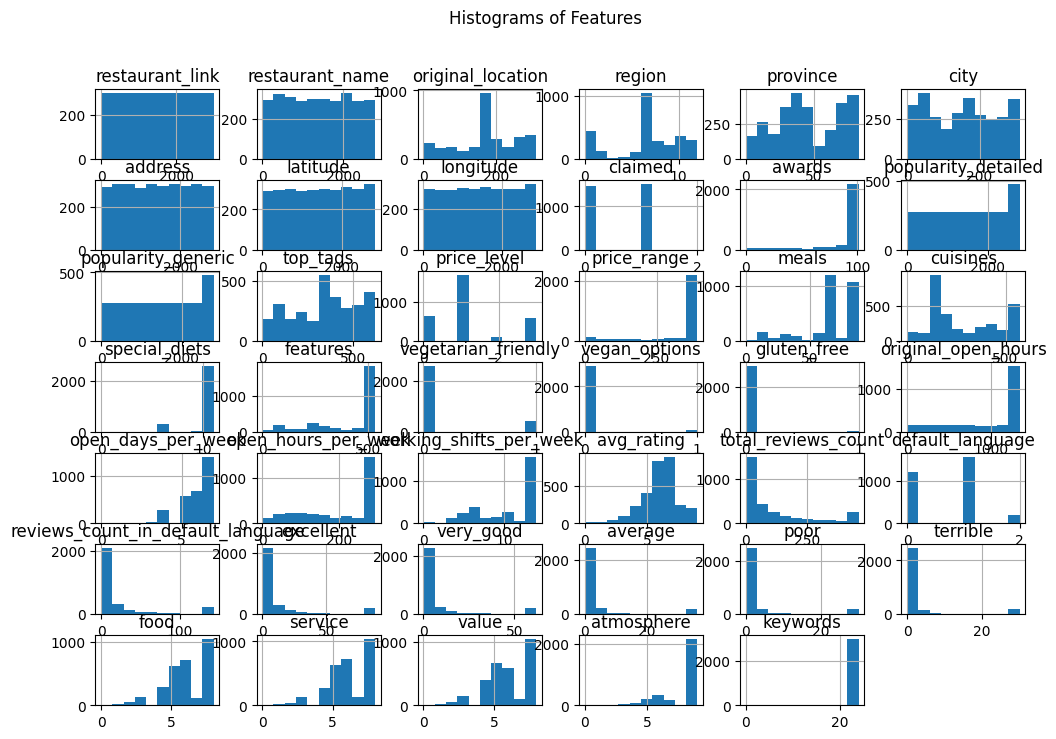

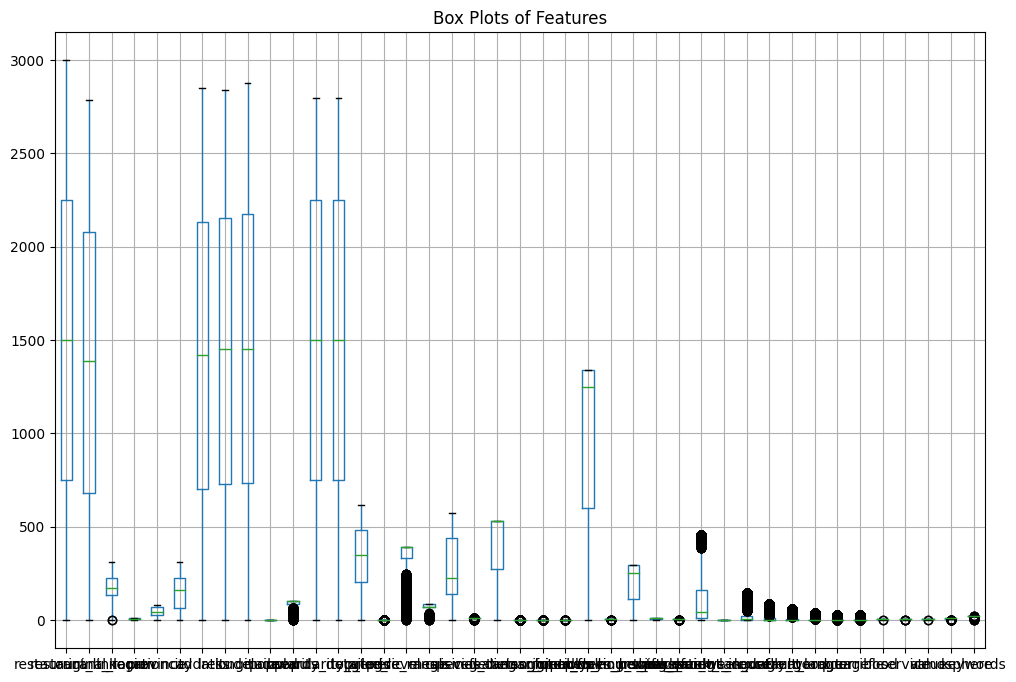

Summary Statistics:
        restaurant_link  restaurant_name  original_location       region  \
count      3000.000000      3000.000000        3000.000000  3000.000000   
mean       1499.500000      1387.753333         172.175667     6.634000   
std         866.169729       805.028153          80.988290     3.441898   
min           0.000000         0.000000           0.000000     0.000000   
25%         749.750000       678.750000         137.000000     5.000000   
50%        1499.500000      1388.500000         172.000000     7.000000   
75%        2249.250000      2080.000000         228.000000     9.000000   
max        2999.000000      2787.000000         312.000000    12.000000   

          province         city      address     latitude    longitude  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000   
mean     45.549000   153.748000  1423.275333  1440.793000  1451.875667   
std      23.347019    92.513906   822.261835   826.956499   835.486614   
min    

In [22]:
# Descriptive Analysis Statistics
summary_stats = df.describe()

# Histograms
df.hist(figsize=(12, 8))
plt.suptitle('Histograms of Features')
plt.show()

# Box Plots
df.boxplot(figsize=(12, 8))
plt.title('Box Plots of Features')
plt.savefig('descriptive_analysis.pdf',dpi = 300, format = 'pdf')
plt.show()

print("Summary Statistics:\n", summary_stats)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   restaurant_link                    3000 non-null   int32
 1   restaurant_name                    3000 non-null   int32
 2   original_location                  3000 non-null   int32
 3   region                             3000 non-null   int32
 4   province                           3000 non-null   int32
 5   city                               3000 non-null   int32
 6   address                            3000 non-null   int32
 7   latitude                           3000 non-null   int64
 8   longitude                          3000 non-null   int64
 9   claimed                            3000 non-null   int32
 10  awards                             3000 non-null   int32
 11  popularity_detailed                3000 non-null   int32
 12  popularity_generic  

## Visualization

d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


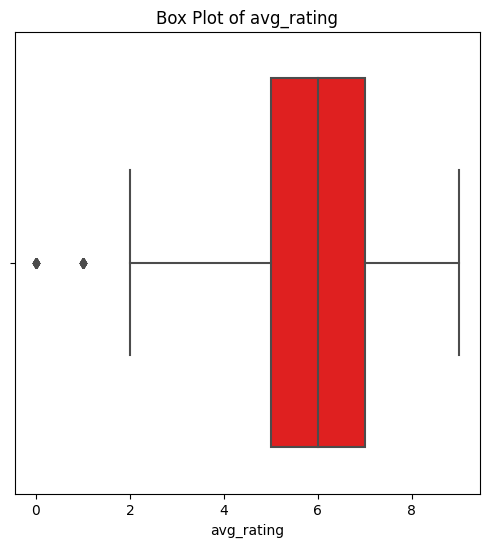

In [16]:
# visualizing target column values after standardization
plt.figure(figsize=(6, 6))
sns.boxplot(x='avg_rating', data=df, palette=['red', 'blue'])
plt.title('Box Plot of avg_rating')
plt.xlabel('avg_rating')
plt.savefig("target_col.pdf", dpi=300, format="pdf")
plt.show()

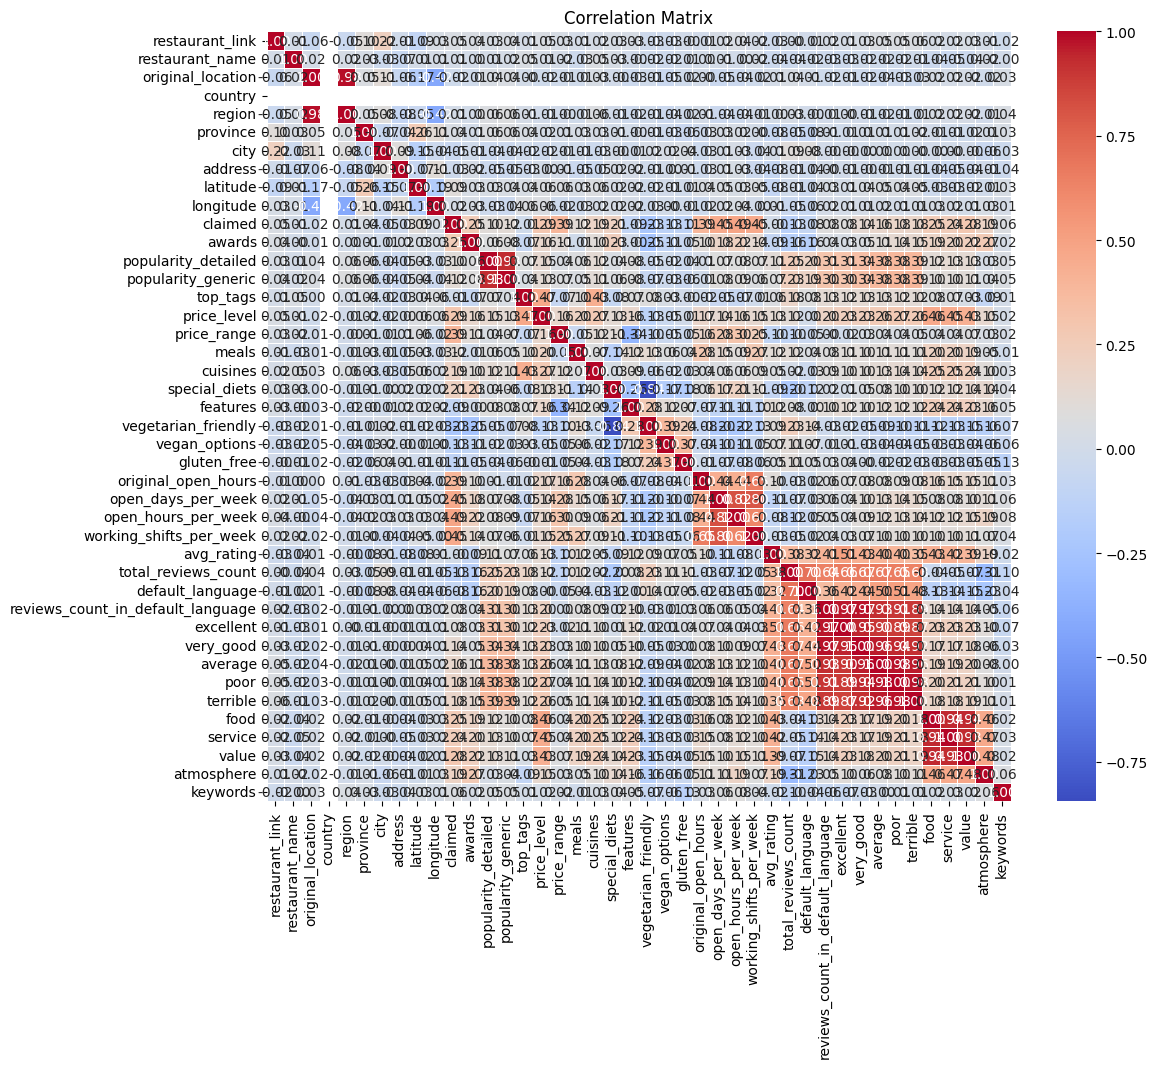

In [17]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.savefig("corr_matrix_heatmap.pdf", dpi=300, format="pdf") # Saving images in pdf
plt.show()

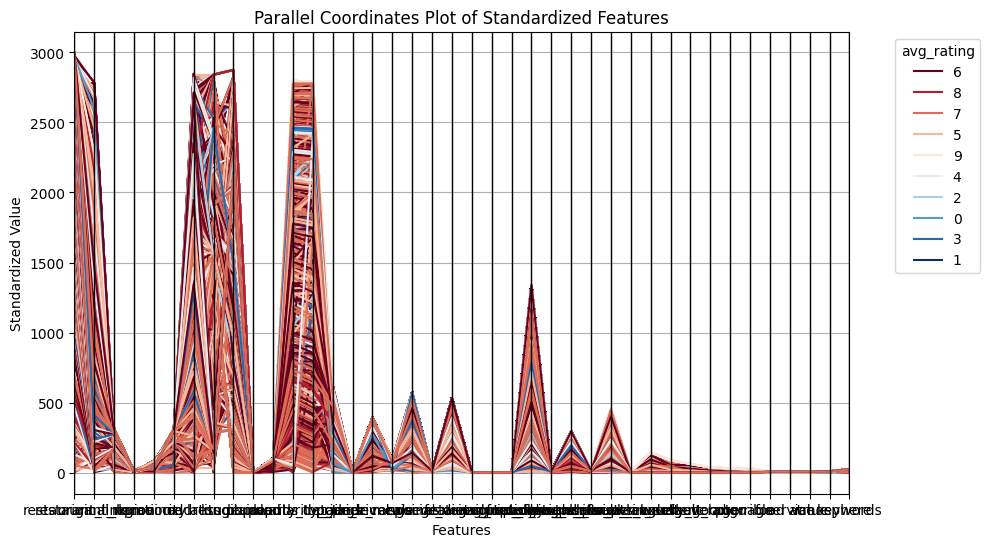

In [18]:
# Plot the parallel coordinates plot to analyze data on it's whole
plt.figure(figsize=(10, 6))
pd.plotting.parallel_coordinates(df, 'avg_rating', colormap='RdBu')

# Display the plot
plt.title('Parallel Coordinates Plot of Standardized Features')
plt.xlabel('Features')
plt.ylabel('Standardized Value')
plt.legend(title='avg_rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("parallel_coordinates_plot.pdf", dpi=300, format="pdf")
plt.show()

d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\ML lab\my

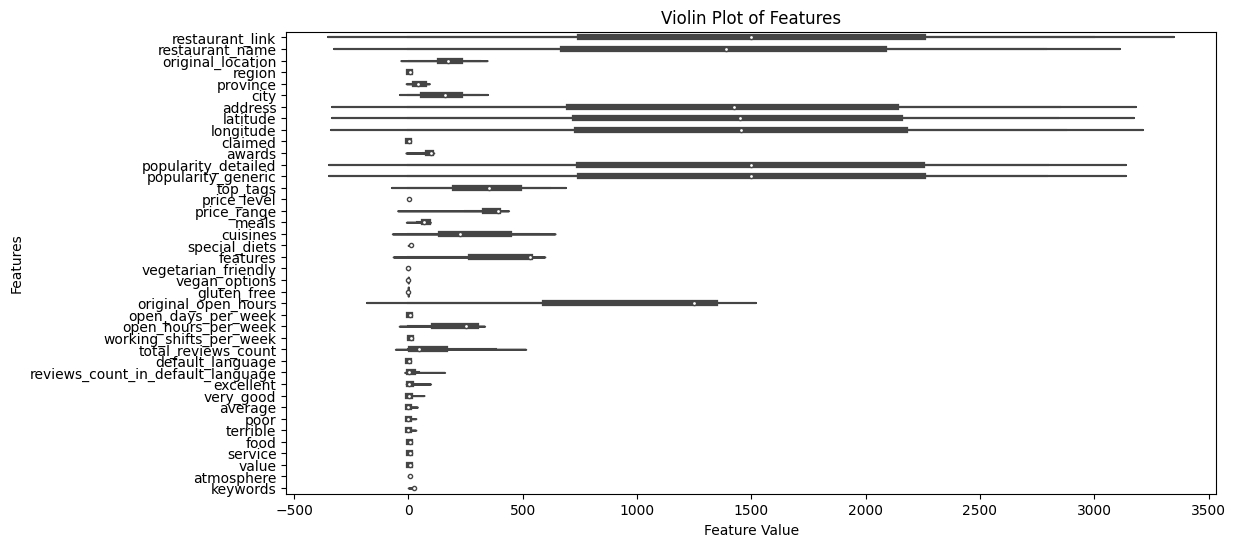

In [19]:
# Create a violin plot for each feature
plt.figure(figsize=(12, 6))
sns.violinplot(data=df.drop('avg_rating', axis=1), inner='box', orient='h')
plt.title('Violin Plot of Features')
plt.xlabel('Feature Value')
plt.ylabel('Features')
plt.savefig("violin_plot.pdf", dpi=300, format="pdf")
plt.show()
